# Facebook Prophet

## Intuition

__Prophet__ is an open source software released by Facebook's Core Data Science Team as a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly and daily seasonality, plus holiday effects.

Prophet works best with time series data that have strong seasonal effects and several seasons of historical data, such as:
- Sales three years in the past with all the seasonalities in there (holidays, weekend, weather, etc).
- With all these information, the model can predict the expected sales may be in the next two months. 

The model is pretty accurate, and therefore Facebook itself uses this tool internally to do the planning like:
- demand planning in the future,
- number of customers forecasting model to visit the site at the specific time in the future.

For more information, please check this out:
- https://research.fb.com/prophet-forecasting-at-scale/
- https://facebook.github.io/prophet/docs/quick_start.html#python-api

## Technical

__Prophet__ implements an __additive regression__ model with four elements:
1. A piecewise linear, Prophet automatically picks up change points in the data and identifies any change in trends.
2. A yearly seasonal component modeled using Fourier series.
3. A weekely seasonal component.
4. A holiday list that can be manually provided.

Additive Regression model takes the form: 


- The functions f1(x) are unknown smoothing functions fit from the data.
- Reference: https://research.fb.com/prophet-forecasting-at-scale/

## Advantages

### Accurate and Fast
- Facebook teams uses Prophet for accurate forecasting and planning.
- Prophet can generate results in seconds.

### Automatic
- No need to perform data preprocessing.
- Prophet works with missing data with several outliers.

### Domain Knowledge Integrarion
- Users can tweak forecast by manually adding domain specific knowledge, such as holidays that can be added manually.

# Model Building

## Load the Data

In [6]:
# import all the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

# Display all the columns in pandas without being truncated
pd.options.display.max_columns = None

In [14]:
sales_df = pd.read_csv('Datasets/test.csv', )
sales_df.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1115,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,2230,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,3345,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,4460,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [15]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      844392 non-null  int64  
 1   Store                      844392 non-null  int64  
 2   DayOfWeek                  844392 non-null  int64  
 3   Date                       844392 non-null  object 
 4   Sales                      844392 non-null  int64  
 5   Customers                  844392 non-null  int64  
 6   Promo                      844392 non-null  int64  
 7   StateHoliday               844392 non-null  object 
 8   SchoolHoliday              844392 non-null  int64  
 9   StoreType                  844392 non-null  object 
 10  Assortment                 844392 non-null  object 
 11  CompetitionDistance        844392 non-null  float64
 12  CompetitionOpenSinceMonth  844392 non-null  float64
 13  CompetitionOpenSinceYear   84

In [5]:
# !pip install fbprophet
from fbprophet import Prophet

The first step of using the tool is to rename the columns of the `date` and the `sales` to `ds` and `y`.

__Note__: I know it's pretty weird, but this is a requirement that Facebook has set for us to begin with the tool. 

In [19]:
def sales_prediction(Store_ID, sales_df, periods):
    # extract based on the Store ID
    
    sales_df = sales_df[ sales_df['Store']==Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date':'ds', 'Sales':'y'})
    sales_df = sales_df.sort_values('ds')
    
    model = Prophet()
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    
    figure = model.plot(forecast, xlabel ='Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)
    
    return sales_df

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,y
7819,2013-01-02,4812
7818,2013-01-03,4675
7817,2013-01-04,5114
7816,2013-01-05,4256
7815,2013-01-07,7804
...,...,...
7040,2015-07-27,7212
7039,2015-07-28,6140
7038,2015-07-29,5524
7037,2015-07-30,6186


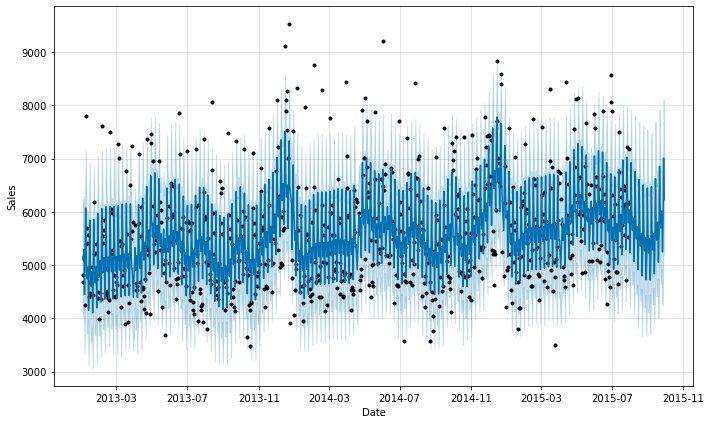

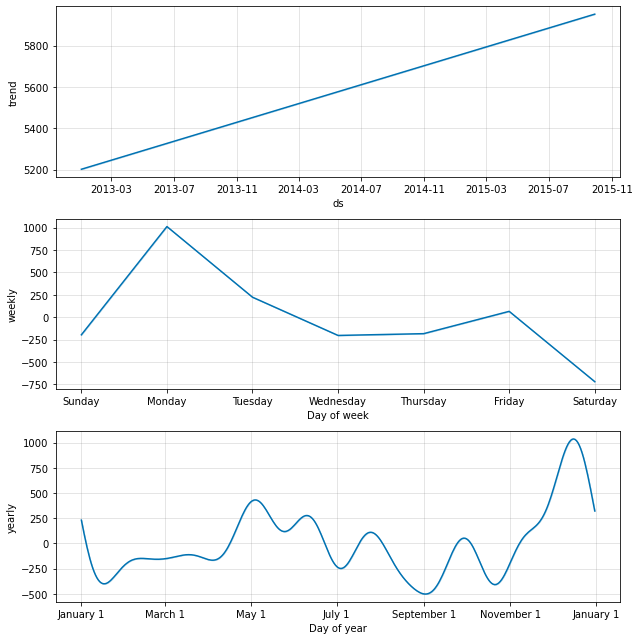

In [20]:
sales_prediction(10, sales_df, 60)

__Insight__
- As you can see, all these black dots are our historical data. And what Facebook Prophet was able to do is to make generate predictions for me in the future. That is why we call it 'Prophet' in the first place.The model can tell me the future sales within every single day in the future. It can tell me also the bounds associated with the upper and lower bounds as well, kind of confidence within that as well, which is pretty incredible. 


- On the Trend Plot, it tells me that the trends were heading upwards. On the weekly trend, it seems that around Monday timeframe, that's where most of the sales happen. 


- On the yearly plot, around January and December timeframe, December is the peak of the sales which makes sense. We can also see the variations among all the different months of the year. So we can say that around May timeframe, it picks up a little bit. 

Using the same function that we used before, we can add Holidays data and try to make predictions for including the holidays.
- `StateHoliday`: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None.

- `SchoolHoliday`: indicates if the (Store, Date) was affected by the closure of public schools. 

In [40]:
def sales_prediction(Store_ID, sales_df, holidays, periods):
    # extract based on the Store ID
    
    sales_df = sales_df[ sales_df['Store']==Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date':'ds', 'Sales':'y'})
    sales_df = sales_df.sort_values('ds')
    
    model = Prophet(holidays=holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    
    figure = model.plot(forecast, xlabel ='Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)
    
    return sales_df

In [28]:
# Get all the dates pertaining to school holidays
school_holidays = sales_df[sales_df['SchoolHoliday']==1].loc[:, 'Date'].values
print(school_holidays)
school_holidays.shape

['2015-07-31' '2015-07-30' '2015-07-29' ... '2013-01-04' '2013-01-03'
 '2013-01-02']


(163457,)

In [37]:
# Get all the dates pertaining to state holidays
state_holidays = sales_df[(sales_df['StateHoliday']=='a') | (sales_df['StateHoliday']=='b') | (sales_df['StateHoliday']=='c')].loc[:, 'Date'].values
state_holidays.shape

(910,)

In [38]:
# Concatenate both schoold and state holidays
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


In [36]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [39]:
school_state_holidays = pd.concat((school_holidays, state_holidays))
school_state_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,y
4686,2013-01-02,6089
4685,2013-01-03,5398
4684,2013-01-04,6092
4683,2013-01-05,3872
4682,2013-01-07,8591
...,...,...
3911,2015-07-27,5723
3910,2015-07-28,4839
3909,2015-07-29,5275
3908,2015-07-30,4790


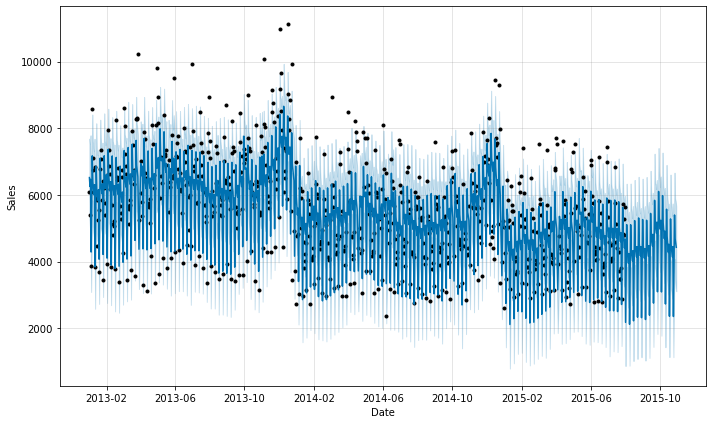

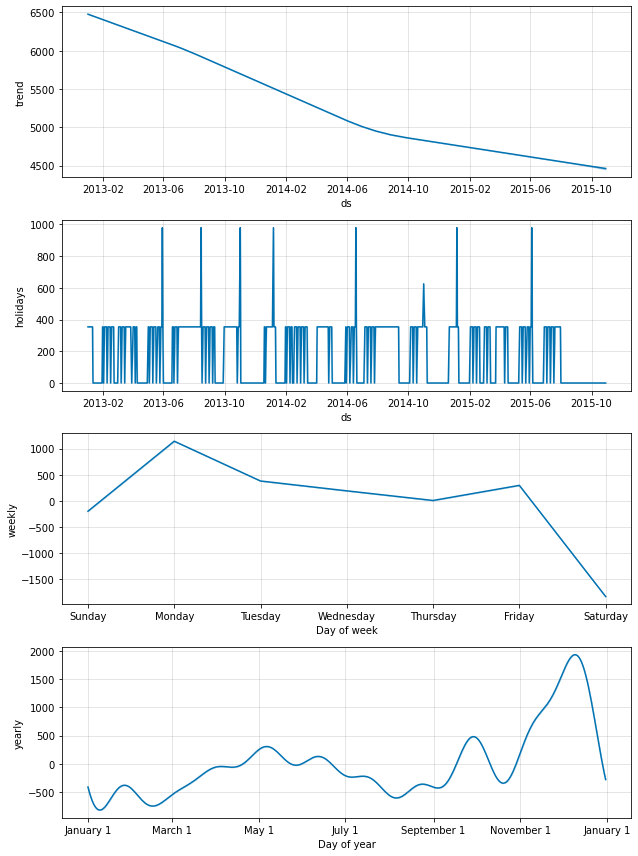

In [41]:
# Let's make predictions using holidays for a specific store (i.e. Store 6 predicting for 90 days in the future)
sales_prediction(6, sales_df, school_state_holidays, 90)

__Insight__:
- It seems that the trend is going down for that specific store (Store 6).
- For holidays, there is a certain spike, especially around december.
- For weakly sales, we can see that the peak sales occur on Monday.
- For yearly sales, we can see that the peak sales occur in December.


__Notes__: For this project, of course we can use other algorithms like Neural Networks such as LSTM network or XGBoost and compare the performance with the Facebook Prophet. 